### Import Libraries

C:\Users\Oseko\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 25ms/step - accuracy: 0.7583 - loss: 0.7259 - val_accuracy: 0.8684 - val_loss: 0.3513
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 25s 27ms/step - accuracy: 0.8634 - loss: 0.3702 - val_accuracy: 0.8802 - val_loss: 0.3238
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 27s 28ms/step - accuracy: 0.8823 - loss: 0.3199 - val_accuracy: 0.8815 - val_loss: 0.3164
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 27s 28ms/step - accuracy: 0.8931 - loss: 0.2898 - val_accuracy: 0.8992 - val_loss: 0.2882
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - accuracy: 0.9037 - loss: 0.2583 - val_accuracy: 0.9016 - val_loss: 0.2746
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - accuracy: 0.9104 - loss: 0.2412 - val_accuracy: 0.9058 - val_loss: 0.2596
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - accuracy: 0.9141 - loss: 0.2323 - val_accuracy: 0.8858 - val_loss: 0.3076
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - accuracy: 0.9181 - loss: 0.2156 - 

C:\Users\Oseko\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 28ms/step - accuracy: 0.6391 - loss: 1.0131 - val_accuracy: 0.7904 - val_loss: 0.5743
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.7573 - loss: 0.6427 - val_accuracy: 0.8255 - val_loss: 0.4681
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 26ms/step - accuracy: 0.7903 - loss: 0.5665 - val_accuracy: 0.8208 - val_loss: 0.4640
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 24ms/step - accuracy: 0.8056 - loss: 0.5284 - val_accuracy: 0.8534 - val_loss: 0.4173
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 24ms/step - accuracy: 0.8155 - loss: 0.5020 - val_accuracy: 0.8535 - val_loss: 0.3786
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 26ms/step - accuracy: 0.8247 - loss: 0.4741 - val_accuracy: 0.8595 - val_loss: 0.3807
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 52s 28ms/step - accuracy: 0.8330 - loss: 0.4588 - val_accuracy: 0.8423 - val_loss: 0.4107
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 27ms/step - accuracy: 0.8386 - loss: 0.44

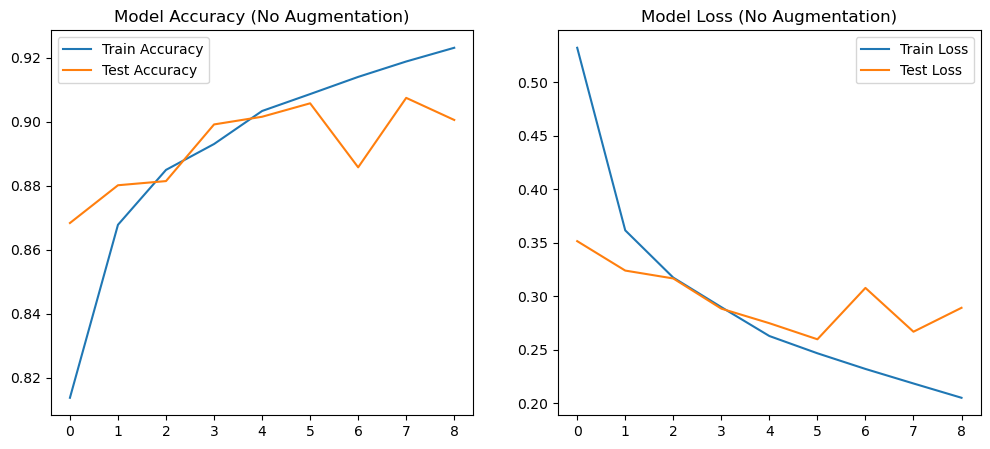

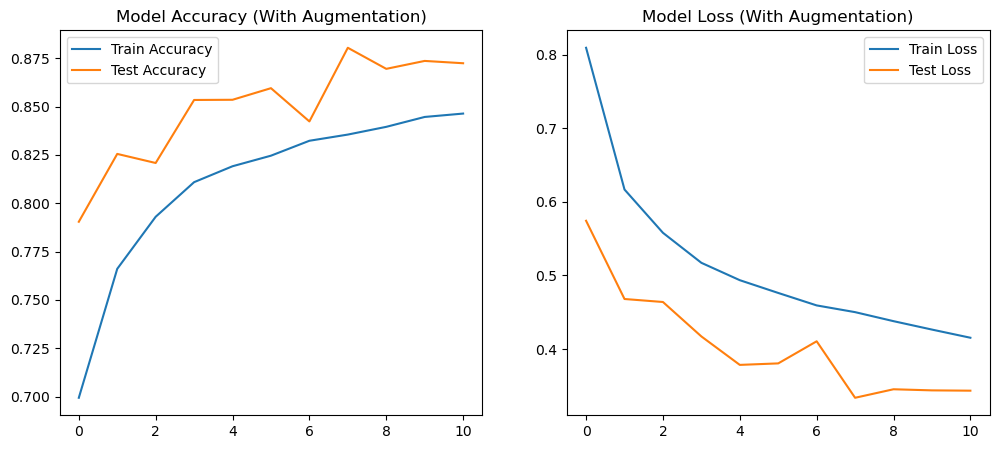

In [1]:

import tensorflow as tf
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# Load the Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape for CNN compatibility
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Convert labels to categorical format (for categorical_crossentropy loss)
y_train_categorical = to_categorical(y_train, num_classes=10)
y_test_categorical = to_categorical(y_test, num_classes=10)

# Define the CNN model with Batch Normalization
def create_model():
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
        BatchNormalization(),
        MaxPooling2D(2,2),
        Conv2D(64, (3,3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(2,2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    return model

# Compile and train the model without augmentation
model = create_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(X_train, y_train_categorical, epochs=20, batch_size=64,
                    validation_data=(X_test, y_test_categorical), callbacks=[early_stopping])

# Define ImageDataGenerator with optimized augmentation
train_datagen = ImageDataGenerator(
    rotation_range=20,   # Reduced from 30 to 20
    zoom_range=0.1,      # Reduced zoom range
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=10       # Reduced shear range
)

train_generator = train_datagen.flow(X_train, y_train, batch_size=32)

# Train model with augmentation and sparse_categorical_crossentropy loss
model_aug = create_model()
model_aug.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_aug = model_aug.fit(train_generator, epochs=20,
                            validation_data=(X_test, y_test), callbacks=[early_stopping])

# Plot training & validation accuracy/loss for both models
plt.figure(figsize=(12, 5))

# Model without augmentation
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.legend()
plt.title('Model Accuracy (No Augmentation)')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend()
plt.title('Model Loss (No Augmentation)')

plt.show()

# Model with augmentation
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_aug.history['accuracy'], label='Train Accuracy')
plt.plot(history_aug.history['val_accuracy'], label='Test Accuracy')
plt.legend()
plt.title('Model Accuracy (With Augmentation)')

plt.subplot(1, 2, 2)
plt.plot(history_aug.history['loss'], label='Train Loss')
plt.plot(history_aug.history['val_loss'], label='Test Loss')
plt.legend()
plt.title('Model Loss (With Augmentation)')

plt.show()


In [2]:
type(fashion_mnist) # fashion_mnist is a module inside tensorflow.keras.datasets

module

### Load Fashion-MNIST dataset

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
#The function load_data() returns a tuple containing training and testing data

# Print the shape of data
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


In [4]:
## mnist.load_data()

### Max Value in the entire X_train dataset

In [5]:
np.max(X_train)

255

### Avg Value in the entire X_train Dataset

In [6]:
np.mean(X_train)

72.94035223214286

### Labels (class names or categories) corresponding to the training dataset X_train

In [7]:
y_train # contains numbers (0–9), each representing a clothing category.

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
np.unique(y_train) # returns the sorted unique class labels present in y_train

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [9]:
class_names = [
    "t-shirt/top", "trouser", "pullover", "dress", "coat",
    "sandal", "shirt", "sneaker", "bag", "ankle boot"
]
print(class_names) 

# 0 → t-shirt/top  
# 1 → trouser  
# 2 → pullover  
# 3 → dress  
# 4 → coat  
# 5 → sandal  
# 6 → shirt  
# 7 → sneaker  
# 8 → bag  
# 9 → ankle boot  



['t-shirt/top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']


## Data Exploration|

### Dimensions of the training dataset 

In [10]:
X_train.shape 

# 60000 → Number of training images (60,000 samples)
# 28 → Image height (28 pixels)
# 28 → Image width (28 pixels)

(60000, 28, 28)

### Dimensions of the testing dataset 

In [11]:
X_test.shape

# 10000 → Number of test images (10,000 samples)
# 28 → Image height (28 pixels)
# 28 → Image width (28 pixels)

(10000, 28, 28)

### Visualizing a sample image from the X_train dataset 

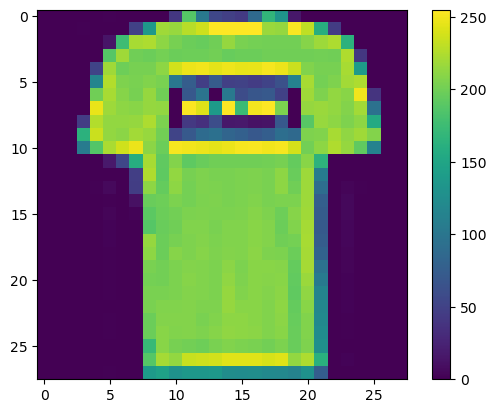

In [12]:
plt.figure() # Creates a new figure in Matplotlib
plt.imshow(X_train[1]) # Displays the second image from X_train
plt.colorbar() # Adds a color scale next to the image.

In [13]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

### Normalize the image pixel values from [0, 255] to [0, 1]

In [14]:
 X_train = X_train/255.0

In [15]:
 X_test = X_test/255.0

In [16]:
 np.max(X_train) # Max pixel value in the dataset X_train

1.0

### Display a sample image to see results after normalization

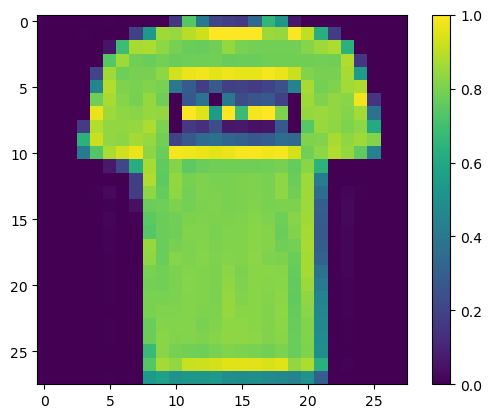

In [17]:
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()

## Data Augmentation

In [18]:
# Reshape for augmentation (adding a channel dimension)
X_train = X_train.reshape(-1, 28, 28, 1)

In [19]:
# Select 5 random images
random_indices = random.sample(range(X_train.shape[0]), 5)
random_images = X_train[random_indices]

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 32s 32ms/step - accuracy: 0.7538 - loss: 0.7235 - val_accuracy: 0.8651 - val_loss: 0.3645
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 30s 32ms/step - accuracy: 0.8626 - loss: 0.3776 - val_accuracy: 0.8837 - val_loss: 0.3138
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 28s 29ms/step - accuracy: 0.8820 - loss: 0.3224 - val_accuracy: 0.8624 - val_loss: 0.3747
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 29s 31ms/step - accuracy: 0.8914 - loss: 0.2964 - val_accuracy: 0.8962 - val_loss: 0.2826
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 25s 27ms/step - accuracy: 0.9040 - loss: 0.2667 - val_accuracy: 0.8968 - val_loss: 0.2903
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 25s 27ms/step - accuracy: 0.9089 - loss: 0.2464 - val_accuracy: 0.8205 - val_loss: 0.6248
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 25s 27ms/step - accuracy: 0.9137 - loss: 0.2346 - val_accuracy: 0.9055 - val_loss: 0.2638
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - accuracy: 0.9186 - loss: 0.2204 - 

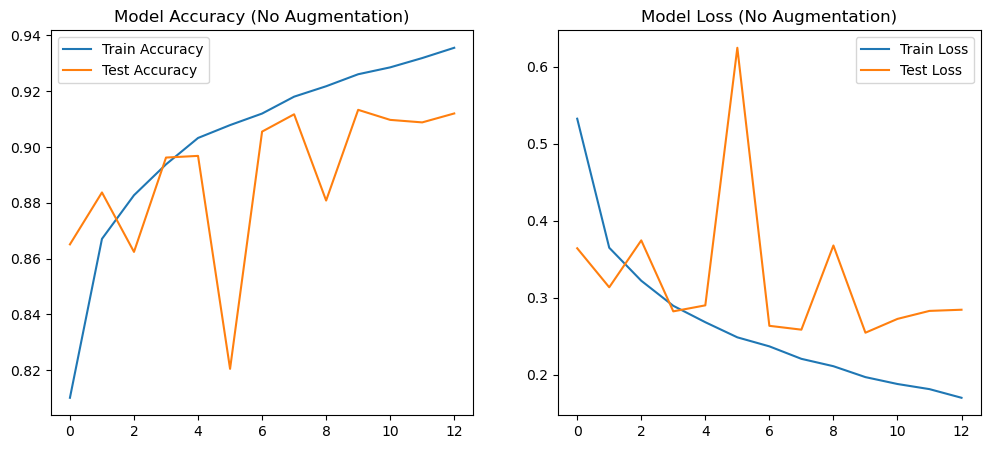

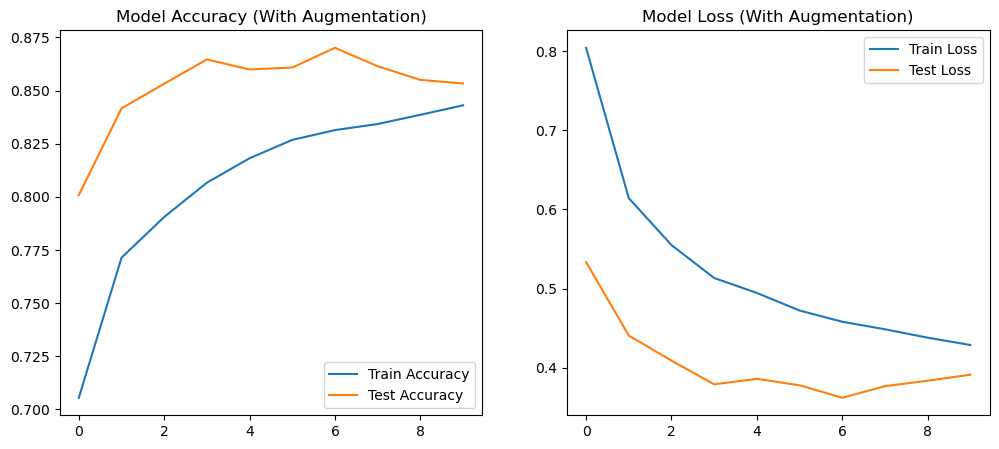

In [20]:

import tensorflow as tf
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# Load the Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape for CNN compatibility
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Convert labels to categorical format (for categorical_crossentropy loss)
y_train_categorical = to_categorical(y_train, num_classes=10)
y_test_categorical = to_categorical(y_test, num_classes=10)

# Define the CNN model with Batch Normalization
def create_model():
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
        BatchNormalization(),
        MaxPooling2D(2,2),
        Conv2D(64, (3,3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(2,2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    return model

# Compile and train the model without augmentation
model = create_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(X_train, y_train_categorical, epochs=20, batch_size=64,
                    validation_data=(X_test, y_test_categorical), callbacks=[early_stopping])

# Define ImageDataGenerator with optimized augmentation
train_datagen = ImageDataGenerator(
    rotation_range=20,   # Reduced from 30 to 20
    zoom_range=0.1,      # Reduced zoom range
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=10       # Reduced shear range
)

train_generator = train_datagen.flow(X_train, y_train, batch_size=32)

# Train model with augmentation and sparse_categorical_crossentropy loss
model_aug = create_model()
model_aug.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_aug = model_aug.fit(train_generator, epochs=20,
                            validation_data=(X_test, y_test), callbacks=[early_stopping])

# Plot training & validation accuracy/loss for both models
plt.figure(figsize=(12, 5))

# Model without augmentation
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.legend()
plt.title('Model Accuracy (No Augmentation)')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend()
plt.title('Model Loss (No Augmentation)')

plt.show()

# Model with augmentation
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_aug.history['accuracy'], label='Train Accuracy')
plt.plot(history_aug.history['val_accuracy'], label='Test Accuracy')
plt.legend()
plt.title('Model Accuracy (With Augmentation)')

plt.subplot(1, 2, 2)
plt.plot(history_aug.history['loss'], label='Train Loss')
plt.plot(history_aug.history['val_loss'], label='Test Loss')
plt.legend()
plt.title('Model Loss (With Augmentation)')

plt.show()


### Visualizing each Aug Techn.

In [21]:

fig, axes = plt.subplots(len(random_images), len(augmentations) + 1, figsize=(12, 12))

# Choose a colormap - you can change this to other options like 'jet', 'plasma', 'inferno', etc.
colormap = 'viridis'

# Create a normalizer to ensure consistent color mapping across all images
# Assuming pixel values are between 0-1 for grayscale images
norm = Normalize(vmin=0, vmax=1)

for i, image in enumerate(random_images):
    # Make sure image is 2D by squeezing if needed
    image_2d = image.squeeze()
    
    # Display the original image with colormap in the first column
    axes[i, 0].imshow(image_2d, cmap=colormap, norm=norm)
    axes[i, 0].set_title("Original")
    axes[i, 0].axis("off")
    
    # Apply each augmentation and display
    for j, (title, generator) in enumerate(augmentations.items()):
        # Prepare image for augmentation
        if len(image.shape) == 2:
            # Add batch and channel dimensions: (28,28) → (1,28,28,1)
            image_for_aug = np.expand_dims(np.expand_dims(image, axis=0), axis=-1)
        elif len(image.shape) == 3 and image.shape[-1] == 1:
            # Just add batch dimension: (28,28,1) → (1,28,28,1)
            image_for_aug = np.expand_dims(image, axis=0)
        else:
            # Handle other cases if needed
            image_for_aug = np.expand_dims(image, axis=0)
            
        # Generate augmented image
        augmented_image = next(generator.flow(image_for_aug, batch_size=1))[0]
        
        # Make sure augmented image is 2D
        augmented_image_2d = augmented_image.squeeze()
        
        # Display augmented image with colormap
        axes[i, j + 1].imshow(augmented_image_2d, cmap=colormap, norm=norm)
        axes[i, j + 1].set_title(title)
        axes[i, j + 1].axis("off")

plt.tight_layout()
plt.show()

NameError: name 'augmentations' is not defined

## Model Training on Original Data  without Augmentation

In [ ]:
# Reshape data to add channel dimension (for CNN)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [ ]:
# Convert labels to categorical (One-Hot Encoding)
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [ ]:
from tensorflow.keras import Input

model = Sequential([
    Input(shape=(28, 28, 1)),  # ✅ Define input shape explicitly
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Summary to confirm the architecture
model.summary()


In [ ]:

import tensorflow as tf
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# Load the Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape for CNN compatibility
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Convert labels to categorical format (for categorical_crossentropy loss)
y_train_categorical = to_categorical(y_train, num_classes=10)
y_test_categorical = to_categorical(y_test, num_classes=10)

# Define the CNN model with Batch Normalization
def create_model():
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
        BatchNormalization(),
        MaxPooling2D(2,2),
        Conv2D(64, (3,3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(2,2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    return model

# Compile and train the model without augmentation
model = create_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(X_train, y_train_categorical, epochs=20, batch_size=64,
                    validation_data=(X_test, y_test_categorical), callbacks=[early_stopping])

# Define ImageDataGenerator with optimized augmentation
train_datagen = ImageDataGenerator(
    rotation_range=20,   # Reduced from 30 to 20
    zoom_range=0.1,      # Reduced zoom range
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=10       # Reduced shear range
)

train_generator = train_datagen.flow(X_train, y_train, batch_size=32)

# Train model with augmentation and sparse_categorical_crossentropy loss
model_aug = create_model()
model_aug.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_aug = model_aug.fit(train_generator, epochs=20,
                            validation_data=(X_test, y_test), callbacks=[early_stopping])

# Plot training & validation accuracy/loss for both models
plt.figure(figsize=(12, 5))

# Model without augmentation
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.legend()
plt.title('Model Accuracy (No Augmentation)')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend()
plt.title('Model Loss (No Augmentation)')

plt.show()

# Model with augmentation
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_aug.history['accuracy'], label='Train Accuracy')
plt.plot(history_aug.history['val_accuracy'], label='Test Accuracy')
plt.legend()
plt.title('Model Accuracy (With Augmentation)')

plt.subplot(1, 2, 2)
plt.plot(history_aug.history['loss'], label='Train Loss')
plt.plot(history_aug.history['val_loss'], label='Test Loss')
plt.legend()
plt.title('Model Loss (With Augmentation)')

plt.show()


In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")


In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend()
plt.title('Model Loss')

plt.show()


## Model Training on Aug. Data 

In [ ]:

import tensorflow as tf
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# Load the Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape for CNN compatibility
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Convert labels to categorical format (for categorical_crossentropy loss)
y_train_categorical = to_categorical(y_train, num_classes=10)
y_test_categorical = to_categorical(y_test, num_classes=10)

# Define the CNN model with Batch Normalization
def create_model():
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
        BatchNormalization(),
        MaxPooling2D(2,2),
        Conv2D(64, (3,3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(2,2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    return model

# Compile and train the model without augmentation
model = create_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(X_train, y_train_categorical, epochs=20, batch_size=64,
                    validation_data=(X_test, y_test_categorical), callbacks=[early_stopping])

# Define ImageDataGenerator with optimized augmentation
train_datagen = ImageDataGenerator(
    rotation_range=20,   # Reduced from 30 to 20
    zoom_range=0.1,      # Reduced zoom range
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=10       # Reduced shear range
)

train_generator = train_datagen.flow(X_train, y_train, batch_size=32)

# Train model with augmentation and sparse_categorical_crossentropy loss
model_aug = create_model()
model_aug.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_aug = model_aug.fit(train_generator, epochs=20,
                            validation_data=(X_test, y_test), callbacks=[early_stopping])

# Plot training & validation accuracy/loss for both models
plt.figure(figsize=(12, 5))

# Model without augmentation
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.legend()
plt.title('Model Accuracy (No Augmentation)')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend()
plt.title('Model Loss (No Augmentation)')

plt.show()

# Model with augmentation
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_aug.history['accuracy'], label='Train Accuracy')
plt.plot(history_aug.history['val_accuracy'], label='Test Accuracy')
plt.legend()
plt.title('Model Accuracy (With Augmentation)')

plt.subplot(1, 2, 2)
plt.plot(history_aug.history['loss'], label='Train Loss')
plt.plot(history_aug.history['val_loss'], label='Test Loss')
plt.legend()
plt.title('Model Loss (With Augmentation)')

plt.show()


In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

In [ ]:
previous_test_acc = 0.9140  # Replace with actual accuracy before augmentation
print(f"Test Accuracy Before Augmentation: {previous_test_acc:.4f}")
print(f"Test Accuracy After Augmentation: {test_acc:.4f}")



In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.legend()
plt.title('Model Accuracy After Augmentation')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend()
plt.title('Model Loss After Augmentation')

plt.show()
